# Preparing Data

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# File path
batting_path = r"C:\Users\timha\Project_2\Batting.csv"
pitching_path = r"C:\Users\timha\Project_2\Pitching.csv"
teams_path = r"C:\Users\timha\Project_2\Teams.csv"
batting_df = pd.read_csv(batting_path)
pitching_df = pd.read_csv(pitching_path)
teams_df = pd.read_csv(teams_path)

# Using teams_df to focus on finding data for the Chicago Cubs (CHN)
cubs_data = teams_df[teams_df['teamID'] == 'CHN']

# Filtered data for years 2005 to 2015
cubs_filtered = cubs_data[(cubs_data['yearID'] >= 2005) & (cubs_data['yearID'] <= 2015)]

# Selecting only the desired columns
columns_to_display = ['yearID', 'W', 'L']

# Printing the filtered data without the index
print(cubs_filtered[columns_to_display].to_string(index=False))

 yearID  W   L
   2005 79  83
   2006 66  96
   2007 85  77
   2008 97  64
   2009 83  78
   2010 75  87
   2011 71  91
   2012 61 101
   2013 66  96
   2014 73  89
   2015 97  65


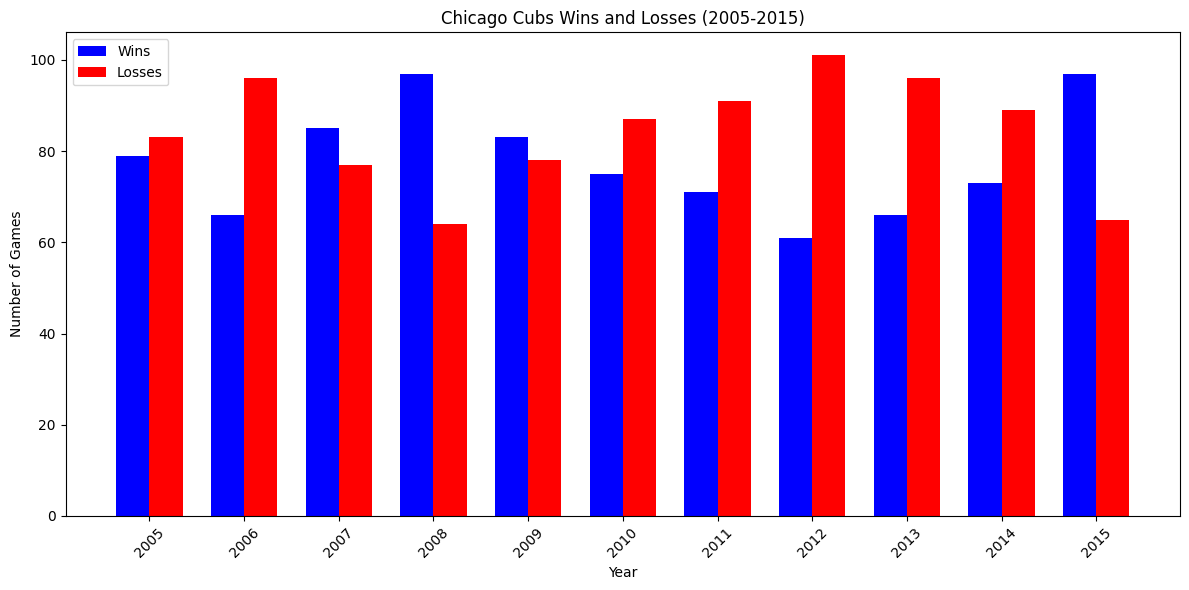

In [133]:
# Create a DataFrame with the given data
data = {
    'yearID': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'W': [79, 66, 85, 97, 83, 75, 71, 61, 66, 73, 97],
    'L': [83, 96, 77, 64, 78, 87, 91, 101, 96, 89, 65]
}
df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(df))

plt.bar(index, df['W'], bar_width, label='Wins', color='blue')
plt.bar([i + bar_width for i in index], df['L'], bar_width, label='Losses', color='red')

plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Chicago Cubs Wins and Losses (2005-2015)')
plt.xticks([i + bar_width/2 for i in index], df['yearID'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# Split the data into training and testing sets

In [104]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Model and Fit the Data to a Logistic Regression

In [ ]:
# Evaluate the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


Probability of winning the next game (based on 2015 data): 0.8123


#  Predicting the Testing Labels

In [106]:
batting_features = ['H', 'HR', 'RBI', 'SB', 'OPS']
pitching_features = ['W', 'ERA', 'SO', 'WHIP', 'SV']

# Use 2015 data as a proxy for 2016 preseason expectations
cubs_2015 = cubs_data[cubs_data['yearID'] == 2015][batting_features + pitching_features]
cubs_2015_scaled = scaler.transform(cubs_2015)

prediction_2016 = model.predict(cubs_2015_scaled)
probability_2016 = model.predict_proba(cubs_2015_scaled)[0][1]

print(f"Predicted outcome for 2016: {'Winning' if prediction_2016[0] else 'Losing'} season")
print(f"Probability of a winning season: {probability_2016:.2f}")

KeyError: "['RBI', 'OPS', 'WHIP'] not in index"

In [103]:
common_features = list(set(X.columns) & set(cubs_data.columns))
print("Common features:", common_features)


Common features: ['H', 'HRA', 'SO', 'CG', 'BB', 'HA', 'R', 'HR', 'SOA', 'BBA', 'ERA', 'IPouts', 'SHO', 'SV']
